# **Understanding the data**

In [43]:
import pandas as pd

weatherDF = pd.read_csv('weather_classification_data.csv')
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [44]:
weatherDF.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [45]:
weatherDF.isna().any()

,0
Temperature,False
Humidity,False
Wind Speed,False
Precipitation (%),False
Cloud Cover,False
Atmospheric Pressure,False
UV Index,False
Season,False
Visibility (km),False
Location,False


# **Preprocessing the Data**

Before performing any analysis or modeling, we need to ensure the data is clean and usable.

In [46]:
weatherDF.dtypes
##need to remove objects/strings

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [47]:
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [48]:
weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
weatherDF['Location'] = weatherDF['Location'].replace({'inland': 1, 'mountain': 0, 'coastal': 2})
weatherDF['Weather Type'] = weatherDF['Weather Type'].replace({'Rainy': 1, 'Cloudy': 0, 'Sunny': 2, 'Snowy': 3})
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

[1 0 2 3]
[1 0 2 3]
[1 0 2]
[1 0 2 3]


<ipython-input-48-7550e9c281f0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
<ipython-input-48-7550e9c281f0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
<ipython-input-48-7550e9c281f0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [49]:
weatherDF.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,int64
Atmospheric Pressure,float64
UV Index,int64
Season,int64
Visibility (km),float64
Location,int64


In [50]:
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,1,3.5,1,1
1,39.0,96,8.5,71.0,1,1011.43,7,0,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,0,5.5,0,2
3,38.0,83,1.5,82.0,0,1026.25,7,0,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,1,2.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,0,1
13196,-1.0,76,3.5,23.0,3,1067.23,1,1,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,0
13198,3.0,76,10.0,94.0,2,984.27,0,1,2.0,1,3


# **Data Visualizations**

<Axes: >

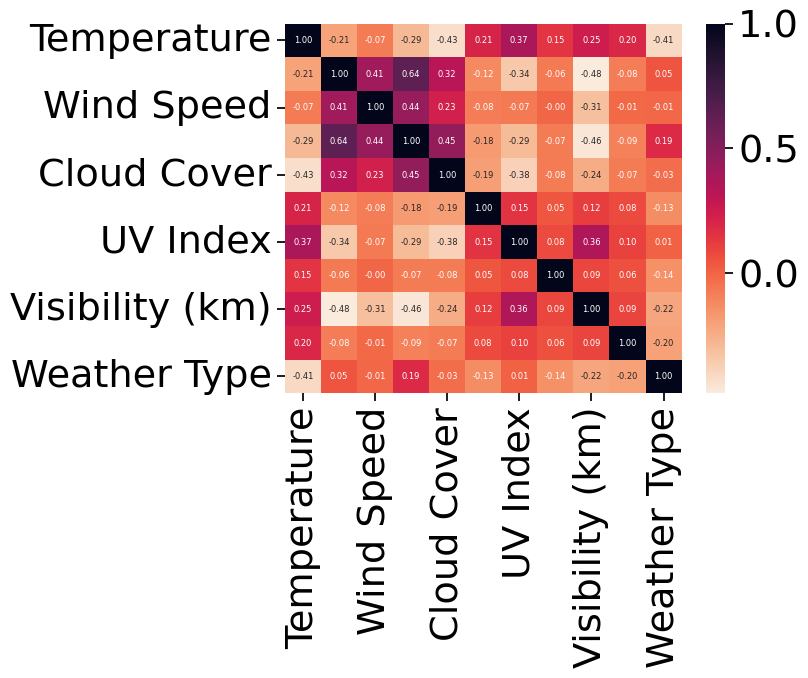

In [51]:
import seaborn as sns
sns.heatmap(weatherDF.corr(), annot=True, cmap='rocket_r', fmt='.2f', annot_kws={"size": 6})

(array([3300.,    0.,    0., 3300.,    0.,    0., 3300.,    0.,    0.,
        3300.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

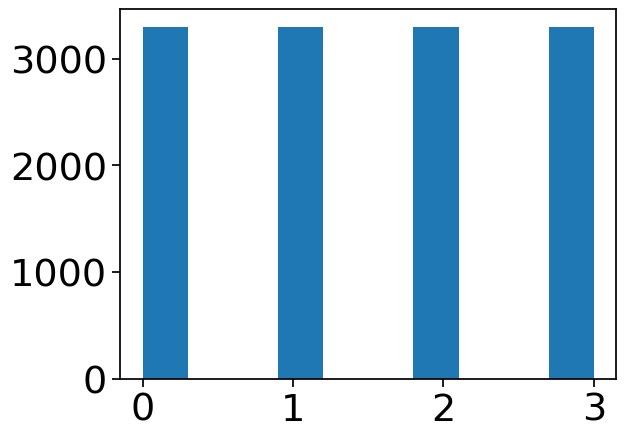

In [52]:
import matplotlib.pyplot as plt ##weather types histplot to see if equal dist
plt.hist(weatherDF['Weather Type'])

If anyone is more creative than me please try and add 1 or 2 more visualizations

# **Spliting Data**

We will need to split our data into train and testing using the train_test_split function so the model to pick up trends and make predictions. Our data will contain everthing from the dataset, except for the last column which is our target value ('Weather Type'). The parameter 'test_size' wil be set to 0.20 so we can have a 80/20 split for our traing and testing sets.

In [53]:
from sklearn.model_selection import train_test_split

otherFeatures = weatherDF.iloc[:, :-1]
target = weatherDF['Weather Type']

X_train, X_test, t_train, t_test = train_test_split(otherFeatures, target, test_size=0.2, random_state=0)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (10560, 10)
Train target shape: (10560,)
Test data shape: (2640, 10)
Test target shape: (2640,)


# **Evaluation Function**

To avoid repeating code, we created a reusable function that prints the Accuracy Scores, Classification Report, and Confusion Matrix Heatmap for any trained model. This makes it easier to compare multiple models and their performance in a consistent way.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, t_train, X_test, t_test):
    """
    Evaluates a trained classification model by printing accuracy, classification report,
    and displaying a confusion matrix heatmap.

    Parameters:
    - model: trained classification model
    - X_train, t_train: training features and labels
    - X_test, t_test: testing features and labels
    """

    # Calculate and print accuracy scores
    train_score = model.score(X_train, t_train)
    test_score = model.score(X_test, t_test)
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

    # Predict and print classification report
    y_pred = model.predict(X_test)
    print(classification_report(t_test, y_pred))

    # Confusion matrix heatmap
    cm = confusion_matrix(t_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('True Values')
    plt.show()

# **Model 1: GaussianNB**

Train Accuracy: 0.8682765151515152
Test Accuracy: 0.8765151515151515

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       659
           1       0.84      0.86      0.85       682
           2       0.87      0.91      0.89       635
           3       0.92      0.92      0.92       664

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



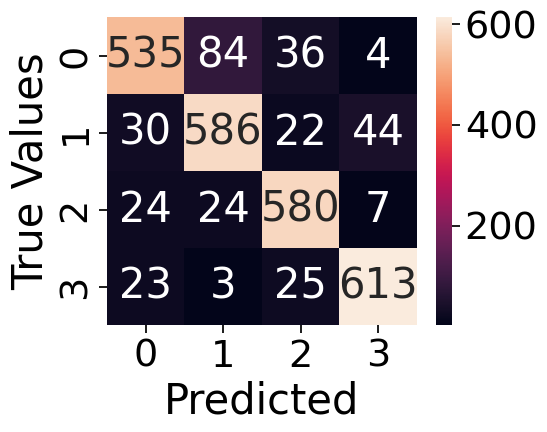

In [55]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, t_train)

evaluate_model(nb_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - GaussianNB Model**

The GaussianNB model has only one main hyperparameter to tune. I used GridSearchCV to search over the following parameter:

- **var_smoothing** – Portion of the largest variance of all features added to variances for stability.

This is Irfans portion this portion is done

{'var_smoothing': 1e-09}
Train Accuracy: 0.8682765151515152
Test Accuracy: 0.8765151515151515

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       659
           1       0.84      0.86      0.85       682
           2       0.87      0.91      0.89       635
           3       0.92      0.92      0.92       664

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



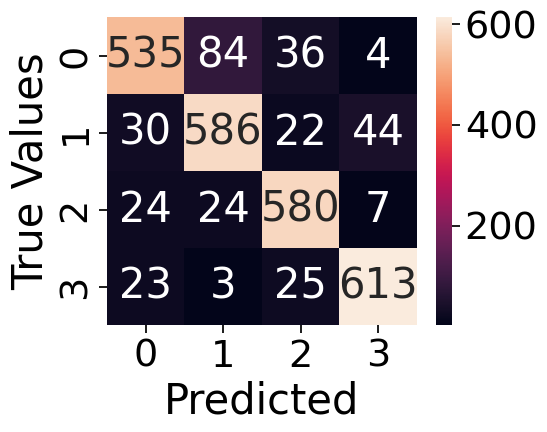

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
hyper_parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

gridSearch = GridSearchCV(nb, hyper_parameters, scoring = 'accuracy')
gridSearch.fit(X_train, t_train)
nb = GaussianNB(**gridSearch.best_params_)
print(gridSearch.best_params_)
nb.fit(X_train, t_train)

# Using the Evaluation Function we created
evaluate_model(nb, X_train, t_train, X_test, t_test)

# **Model 2: Random Forest**


This is ethans portion and it is done

Train Accuracy: 1.0
Test Accuracy: 0.9208333333333333

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       659
           1       0.91      0.92      0.92       682
           2       0.92      0.93      0.92       635
           3       0.94      0.93      0.94       664

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



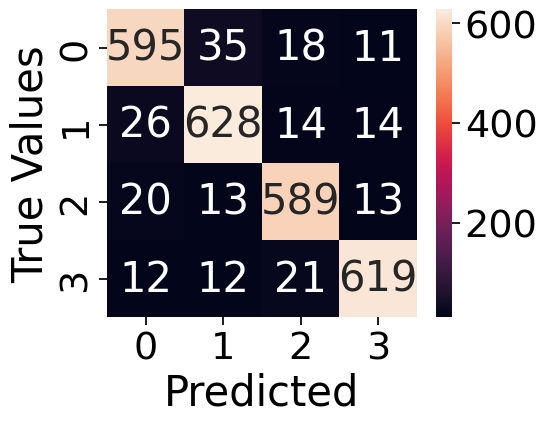

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, t_train)

evaluate_model(rf_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - Random Forest Model**

The RandomForestClassifier offers many hyperparameters that affect both performance and overfitting. I used GridSearchCV to search over the following parameters:

- **criterion** – Function to measure the quality of a split.
- **max_depth** – Maximum depth of each tree.
- **min_samples_split** – Minimum samples required to split a node.
- **min_samples_leaf** – Minimum samples required at a leaf node.
- **max_leaf_nodes** – Maximum number of leaf nodes per tree.

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}
Train Accuracy: 0.9443181818181818
Test Accuracy: 0.9208333333333333

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       659
           1       0.90      0.93      0.91       682
           2       0.92      0.92      0.92       635
           3       0.98      0.92      0.95       664

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



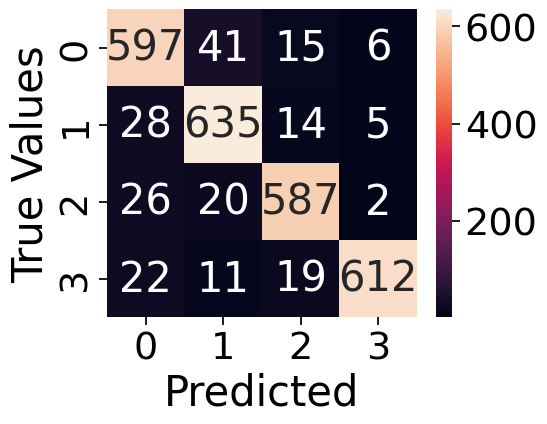

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# Hyper-parameters that will be search for the best value
hyper_parameters = {
  "criterion": ["gini", "entropy"],
  "max_depth": [5, 10],
  "min_samples_split": [2, 5],
  "min_samples_leaf": [1, 2],
  "max_leaf_nodes": [10, 30, 50]
}
gridSearch = GridSearchCV(rf_model, hyper_parameters, scoring = 'accuracy')
gridSearch.fit(X_train, t_train)
rf_model = RandomForestClassifier(**gridSearch.best_params_)
print(gridSearch.best_params_)
rf_model.fit(X_train, t_train)

evaluate_model(rf_model, X_train, t_train, X_test, t_test)

# **Model 3: Logistic Regression**

In [ ]:
## This is ryans portion and he will implement logistic regression , will be done by 4/30

# **Parameter Tuning Model 3**

In [ ]:
## Train model again but this time with grid search (the more hyperparamters you put, the longer it will take to run cell), then evaluate results


# **Model 4: LightGBM**

In [ ]:
## Pick the next model, train with no paramters, then evaluate results
###his is Bobbys portion and he will implement LightGBM , will be done by 4/30

# **Parameter Tuning Model 4**

In [ ]:
## Train model again but this time with grid search (the more hyperparamters you put, the longer it will take to run cell), then evaluate results

# **Model 5: SVM**

In [ ]:
## Pick the next model, train with no paramters, then evaluate results
###his is Dangs portion and he will implement SVM , will be done by 4/30

# **Parameter Tuning Model 5**

In [ ]:
## Train model again but this time with grid search (the more hyperparamters you put, the longer it will take to run cell), then evaluate results